<a href="https://colab.research.google.com/github/n1lima/correlacao-enem-idhm-2021/blob/main/dataPcg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!gdown --id '1GI8yAhpHCwbim98sWlotToyfJ-cCBWTf'
!gdown --id '1sTNNIySG4MbaSG3iZXpNhhEapZ-vAJpH'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GI8yAhpHCwbim98sWlotToyfJ-cCBWTf
To: /content/ADH_BASE_RADAR_2012-2021.xlsx
100% 2.20M/2.20M [00:00<00:00, 131MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1sTNNIySG4MbaSG3iZXpNhhEapZ-vAJpH
From (redirected): https://drive.google.com/uc?id=1sTNNIySG4MbaSG3iZXpNhhEapZ-vAJpH&confirm=t&uuid=c6d1f098-65a1-42c0-87b6-9e1d398702ca
To: /content/MICRODADOS_ENEM_2021.csv
100% 1.51G/1.51G [00:26<00:00, 57.1MB/s]


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.options.display.float_format = '{:,.2f}'.format

# Importando Dados - Enem


In [80]:
microdados_enem = pd.read_csv('MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')

In [81]:
microdados_enem.shape

(3389832, 76)

In [82]:
retirar_enem = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC','TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5','Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

#retirando colunas desnecessárias para nossa análise (Execute a célula somente uma vez!)
microdados_enem.drop(columns=retirar_enem, axis=1, inplace=True)

In [83]:
microdados_enem.columns

Index(['SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [84]:
microdados_enem.shape

(3389832, 6)

In [85]:
# Fazendo uma cópia do DataFrame 'microdados_enem' em um novo DataFrame chamado 'seg_enem'
# para que possamos modificar os dados sem afetar o DataFrame original.
seg_enem = microdados_enem.copy()

# Importando Dados - IDHM por RM

In [86]:
dados_idhm = pd.read_excel('ADH_BASE_RADAR_2012-2021.xlsx')

In [87]:
#  Este conjunto de dados tem 490 linhas e 83 colunas
dados_idhm.shape

(490, 83)

In [88]:
# selecionando dados apenas de 2021 e as Regiões Metropolitadas
dados_idhm21 = dados_idhm[(dados_idhm['ANO'] == 2021) & (dados_idhm['AGREGACAO'] == 'RM_RIDE')].copy()
dados_idhm21.shape

(21, 83)

In [89]:
#retirando colunas que não iremos usar para a análise
retirar_idhm = ['CODIGO', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M']

#retirando colunas desnecessárias para nossa análise (Execute a célula somente uma vez!)
dados_idhm21.drop(columns=retirar_idhm, axis=1, inplace=True)

In [90]:
dados_idhm21.columns

Index(['ANO', 'AGREGACAO', 'NOME', 'IDHM'], dtype='object')

In [91]:
# Fazendo uma cópia do DataFrame 'dados_idhm' em um novo DataFrame chamado 'seg_idhm'
# para que possamos modificar os dados sem afetar o DataFrame original.
seg_idhm = dados_idhm21.copy()

#Mapeamento de Regiões Metropolitanas

In [92]:
estados_rm = {
    'AM': 'Região Metropolitana de Manaus (AM)',
    'PA': 'Região Metropolitana de Belém (PA)',
    'AP': 'Região Metropolitana de Macapá (AP)',
    'MA': 'Região Metropolitana de Grande São Luís (MA)',
    'PI': 'Região Administrativa Integrada de Desenvolvimento da Grande Teresina (PI)',
    'CE': 'Região Metropolitana de Fortaleza (CE)',
    'RN': 'Região Metropolitana de Natal (RN)',
    'PB': 'Região Metropolitana de João Pessoa (PB)',
    'PE': 'Região Metropolitana de Recife (PE)',
    'AL': 'Região Metropolitana de Maceió (AL)',
    'SE': 'Região Metropolitana de Aracaju (SE)',
    'BA': 'Região Metropolitana de Salvador (BA)',
    'MG': 'Região Metropolitana de Belo Horizonte (MG)',
    'ES': 'Região Metropolitana de Grande Vitória (ES)',
    'RJ': 'Região Metropolitana de Rio de Janeiro (RJ)',
    'SP': 'Região Metropolitana de São Paulo (SP)',
    'PR': 'Região Metropolitana de Curitiba (PR)',
    'SC': 'Região Metropolitana de Florianópolis (SC)',
    'RS': 'Região Metropolitana de Porto Alegre (RS)',
    'MT': 'Região Metropolitana de Vale do Rio Cuiabá (MT)',
    'GO': 'Região Metropolitana de Goiânia (GO)'
}


In [93]:
# Criando uma nova coluna com a região metropolitana, mapeando os códigos de estado
seg_enem['RM'] = seg_enem['SG_UF_ESC'].map(estados_rm)

In [94]:
seg_enem['RM']

,RM
0,NaN
1,NaN
2,NaN
3,Região Metropolitana de Fortaleza (CE)
4,Região Metropolitana de Fortaleza (CE)
...,...
3389827,NaN
3389828,NaN
3389829,NaN
3389830,NaN


In [95]:
# Verifica se há algum NaN na coluna 'RM'
if seg_enem['RM'].isnull().any():
    seg_enem.dropna(subset=['RM'],inplace=True)

In [96]:
seg_enem['RM']

,RM
3,Região Metropolitana de Fortaleza (CE)
4,Região Metropolitana de Fortaleza (CE)
14,Região Metropolitana de Salvador (BA)
33,Região Metropolitana de Salvador (BA)
45,Região Metropolitana de Grande Vitória (ES)
...,...
3389519,Região Metropolitana de Salvador (BA)
3389548,Região Metropolitana de Macapá (AP)
3389553,Região Metropolitana de Vale do Rio Cuiabá (MT)
3389744,Região Metropolitana de Manaus (AM)


In [97]:
seg_enem.drop(columns=['SG_UF_ESC'], inplace=True)

In [98]:
seg_enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,RM
3,580.70,678.90,638.90,659.50,780.00,Região Metropolitana de Fortaleza (CE)
4,497.70,532.40,457.60,582.60,780.00,Região Metropolitana de Fortaleza (CE)
14,NaN,NaN,NaN,NaN,NaN,Região Metropolitana de Salvador (BA)
33,414.60,410.10,386.70,423.00,700.00,Região Metropolitana de Salvador (BA)
45,476.80,608.50,534.20,570.20,640.00,Região Metropolitana de Grande Vitória (ES)


# Média das notas do enem

In [99]:
seg_enem['MEDIA_NOTAS'] = seg_enem[['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_REDACAO']].fillna(0).mean(axis=1)

In [100]:
seg_enem = seg_enem.groupby('RM')['MEDIA_NOTAS'].mean().sort_values(ascending=False).reset_index().copy()

In [101]:
seg_enem

,RM,MEDIA_NOTAS
0,Região Metropolitana de Natal (RN),475.10
1,Região Metropolitana de Rio de Janeiro (RJ),465.00
2,Região Metropolitana de São Paulo (SP),464.87
3,Região Metropolitana de Belo Horizonte (MG),455.81
4,Região Administrativa Integrada de Desenvolvim...,448.30
5,Região Metropolitana de Porto Alegre (RS),445.45
6,Região Metropolitana de Grande Vitória (ES),444.46
7,Região Metropolitana de Aracaju (SE),437.72
8,Região Metropolitana de Maceió (AL),437.54
9,Região Metropolitana de Curitiba (PR),435.32


# Agrupando os dados


In [107]:
seg_idhm.columns

Index(['ANO', 'AGREGACAO', 'RM', 'IDHM'], dtype='object')

In [108]:
seg_enem.columns

Index(['RM', 'MEDIA_NOTAS'], dtype='object')

In [109]:
seg_idhm.rename(columns={'NOME':'RM'}, inplace=True)
seg_idhm['ANO'] = seg_idhm['ANO'].replace(',', '').astype(int)

In [110]:
dados_2021 = seg_idhm.merge(seg_enem, on='RM', how='inner').sort_values(by=['MEDIA_NOTAS'], ascending=False).reset_index(drop=True)

In [111]:
dados_2021

,ANO,AGREGACAO,RM,IDHM,MEDIA_NOTAS
0,2021,RM_RIDE,Região Metropolitana de Natal (RN),0.74,475.10
1,2021,RM_RIDE,Região Metropolitana de Rio de Janeiro (RJ),0.81,465.00
2,2021,RM_RIDE,Região Metropolitana de São Paulo (SP),0.84,464.87
3,2021,RM_RIDE,Região Metropolitana de Belo Horizonte (MG),0.80,455.81
4,2021,RM_RIDE,Região Administrativa Integrada de Desenvolvim...,0.72,448.30
5,2021,RM_RIDE,Região Metropolitana de Porto Alegre (RS),0.79,445.45
6,2021,RM_RIDE,Região Metropolitana de Grande Vitória (ES),0.80,444.46
7,2021,RM_RIDE,Região Metropolitana de Aracaju (SE),0.74,437.72
8,2021,RM_RIDE,Região Metropolitana de Maceió (AL),0.72,437.54
9,2021,RM_RIDE,Região Metropolitana de Curitiba (PR),0.81,435.32


# Gráficos

In [112]:
sns.set_theme(style='whitegrid', context='talk')

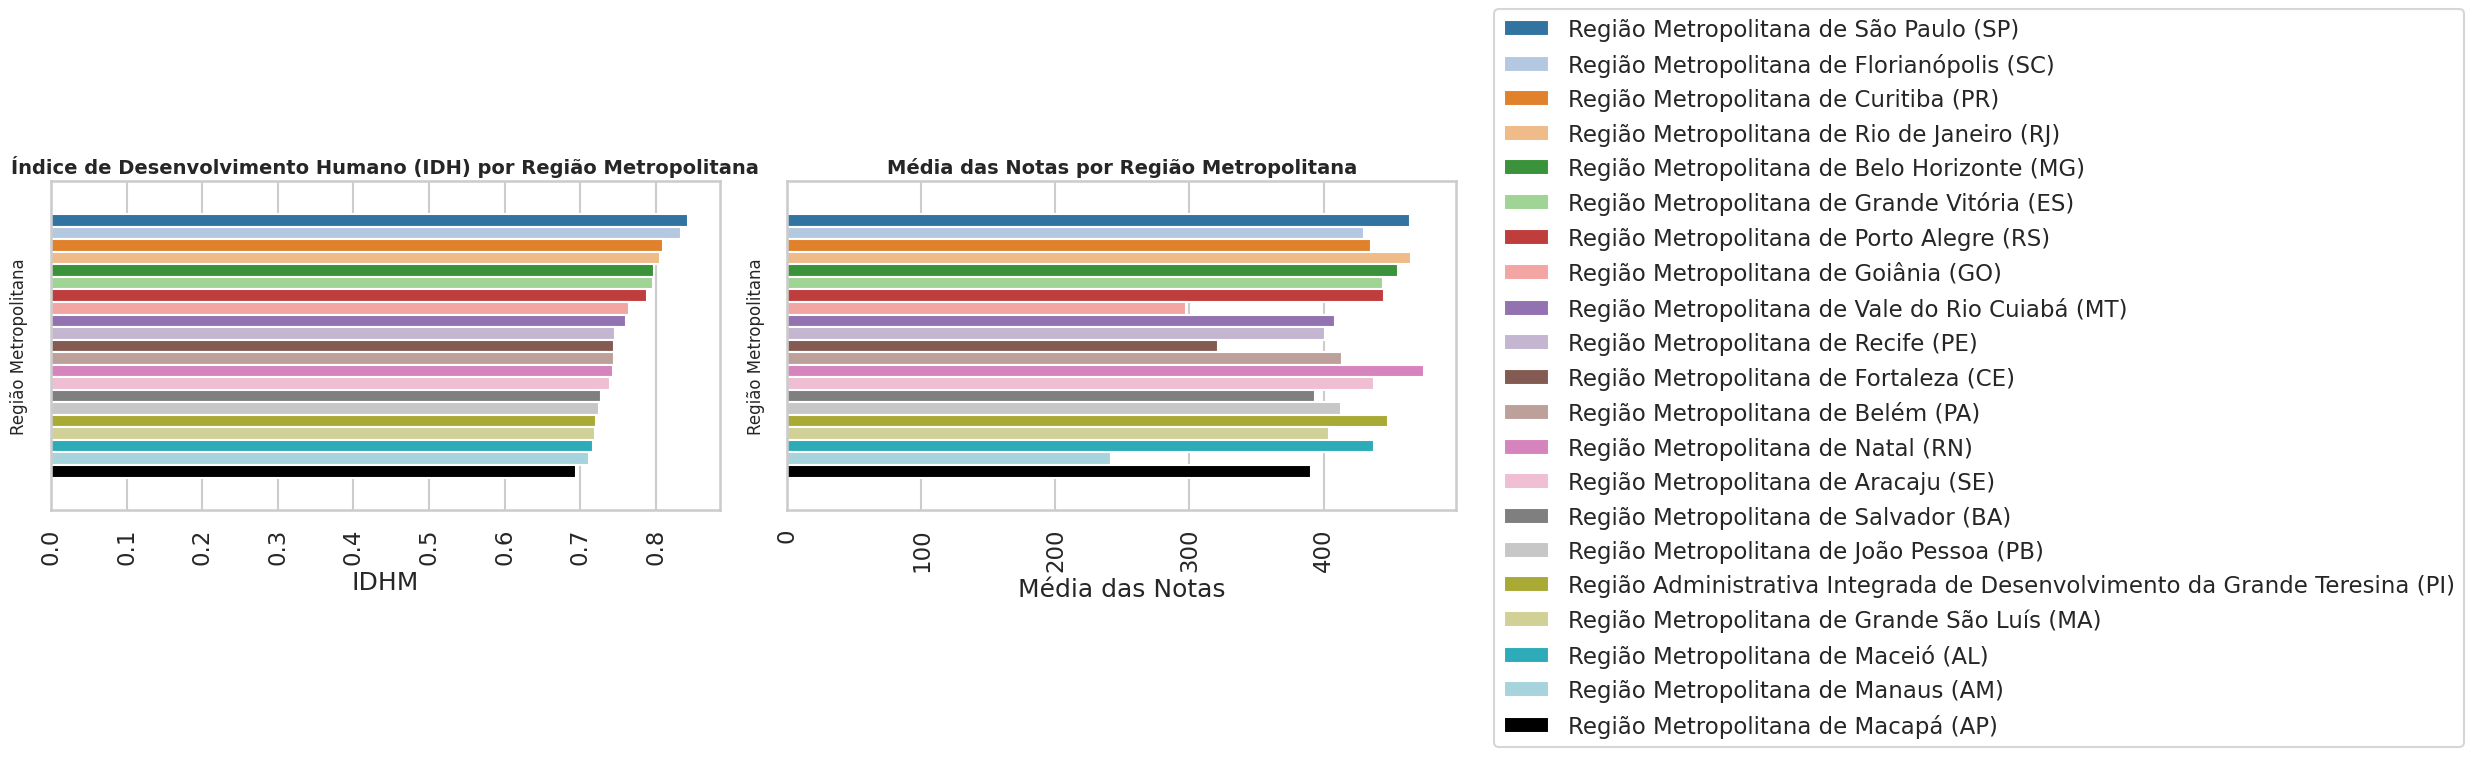

In [122]:
# Cria subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

#Definindo cores
tab20_palette = sns.color_palette("tab20")
custom_palette = tab20_palette + ['#000000']

# Gráfico 1: IDHM
# dados_2021 = dados_2021.sort_values('IDHM', ascending=False)
sns.barplot(data=dados_2021, x='IDHM', hue='RM', ax=axes[0], palette=custom_palette)
axes[0].set_title('IDHM por Região Metropolitana')
axes[0].set_xlabel('IDHM')
axes[0].tick_params(axis='x', rotation=90)

axes[0].set_title('Índice de Desenvolvimento Humano (IDH) por Região Metropolitana', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Região Metropolitana', fontsize=12)

# Gráfico 2: Média das Notas
# dados_2021 = dados_2021.sort_values('MEDIA_NOTAS', ascending=False)
sns.barplot(data=dados_2021, x='MEDIA_NOTAS', hue='RM', ax=axes[1], palette=custom_palette)
axes[1].set_title('Média das Notas por Região Metropolitana')
axes[1].set_xlabel('Média das Notas')
axes[1].tick_params(axis='x', rotation=90)

axes[1].set_title('Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Região Metropolitana', fontsize=12)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()

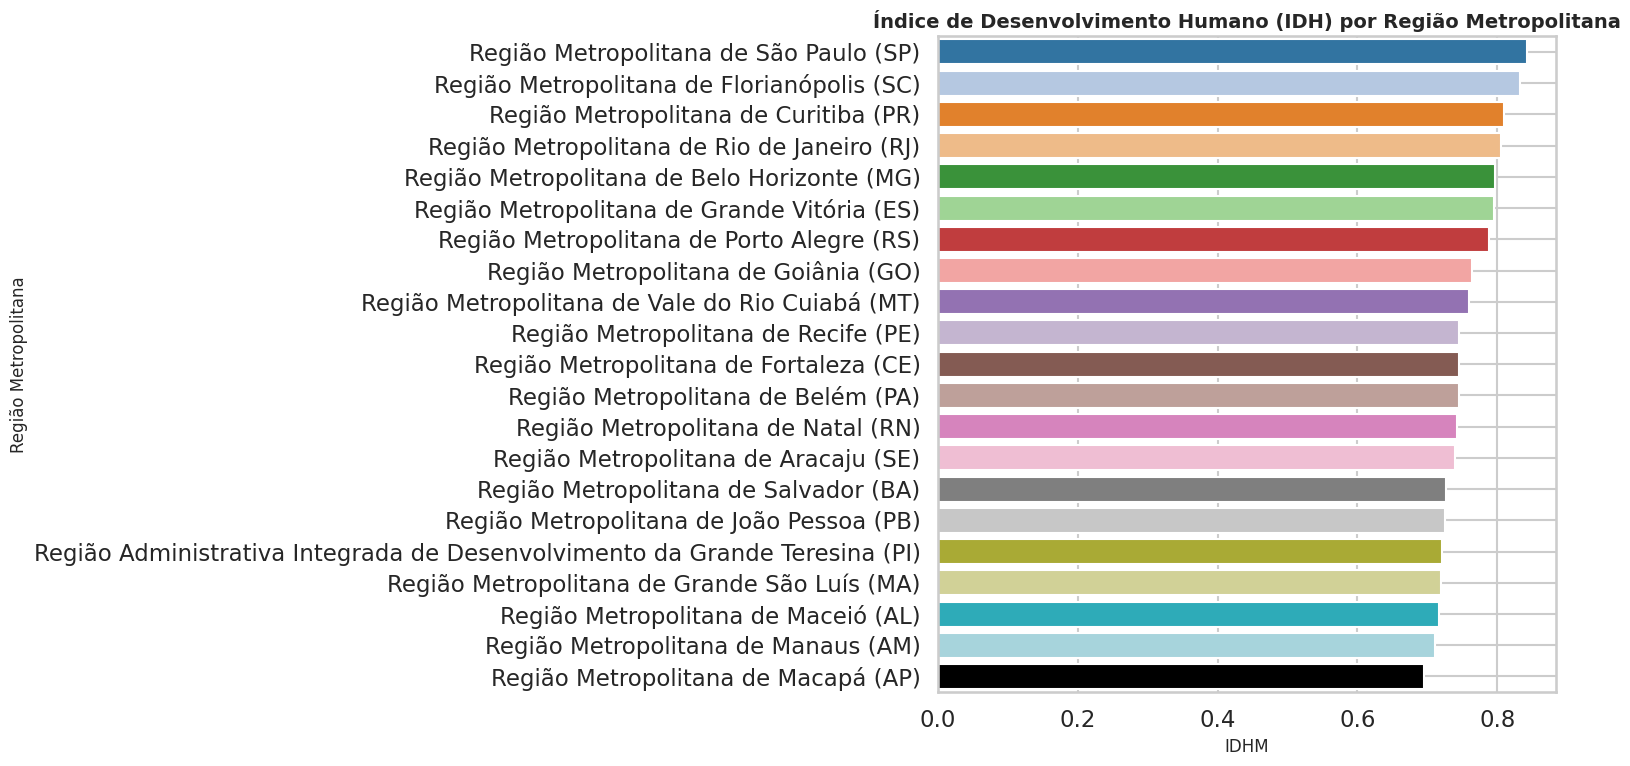

In [121]:
# Gráfico 1: IDHM por Região Metropolitana
dados_2021 = dados_2021.sort_values('IDHM', ascending=False)

plt.figure(figsize=(16, 8))

tab20_palette = sns.color_palette("tab20")
custom_palette = tab20_palette + ['#000000']

sns.barplot(data=dados_2021, y='RM', x='IDHM', hue='RM', palette=custom_palette)
plt.title('Índice de Desenvolvimento Humano (IDH) por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('IDHM', fontsize=12)
plt.ylabel('Região Metropolitana', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


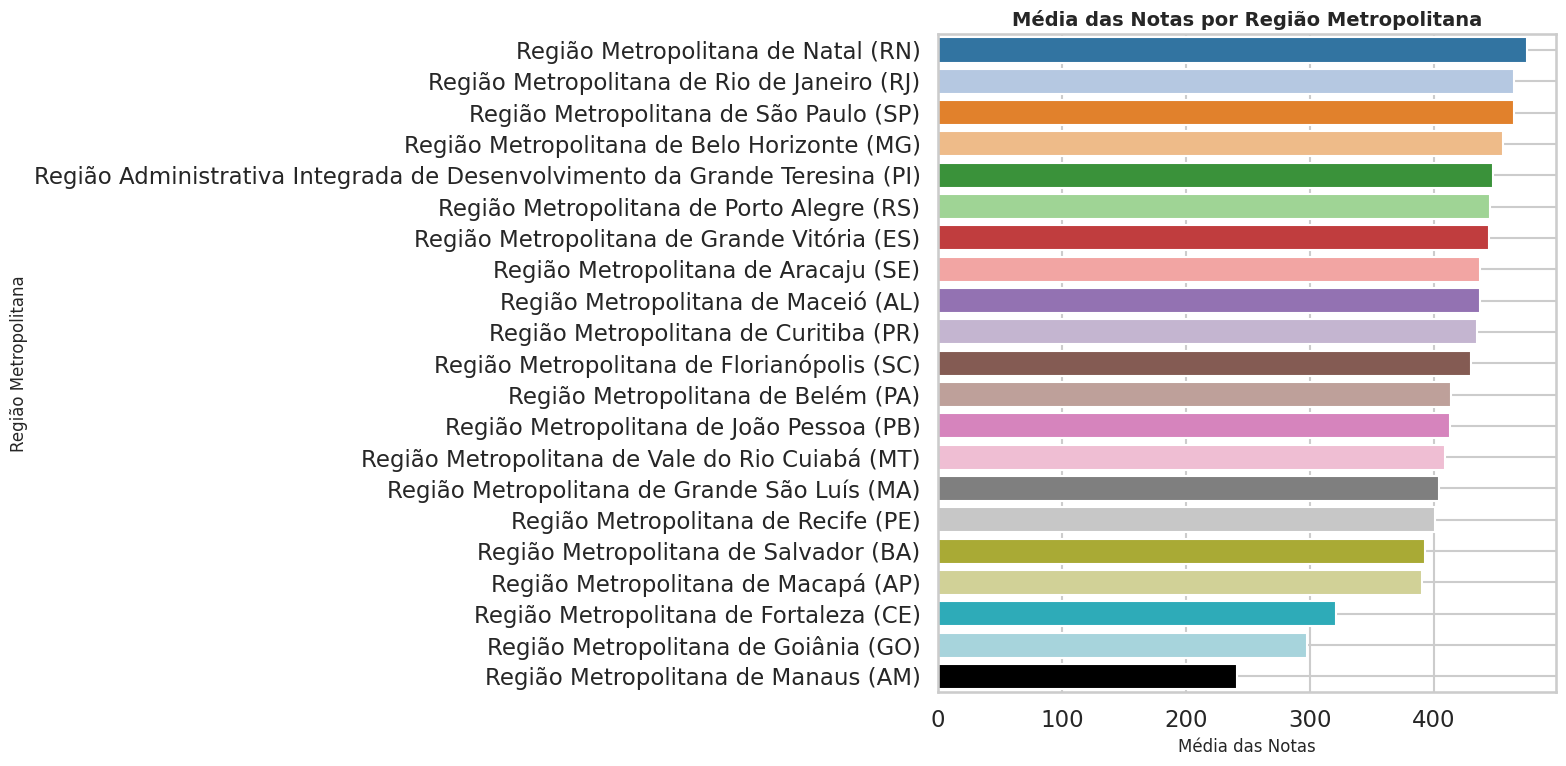

In [120]:
# Gráfico 2: Média das Notas por Região Metropolitana
dados_2021 = dados_2021.sort_values('MEDIA_NOTAS', ascending=False)

plt.figure(figsize=(16, 8))

tab20_palette = sns.color_palette("tab20")
custom_palette = tab20_palette + ['#000000']

sns.barplot(data=dados_2021, y='RM', x='MEDIA_NOTAS', hue='RM', palette=custom_palette)
plt.title('Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('Região Metropolitana', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

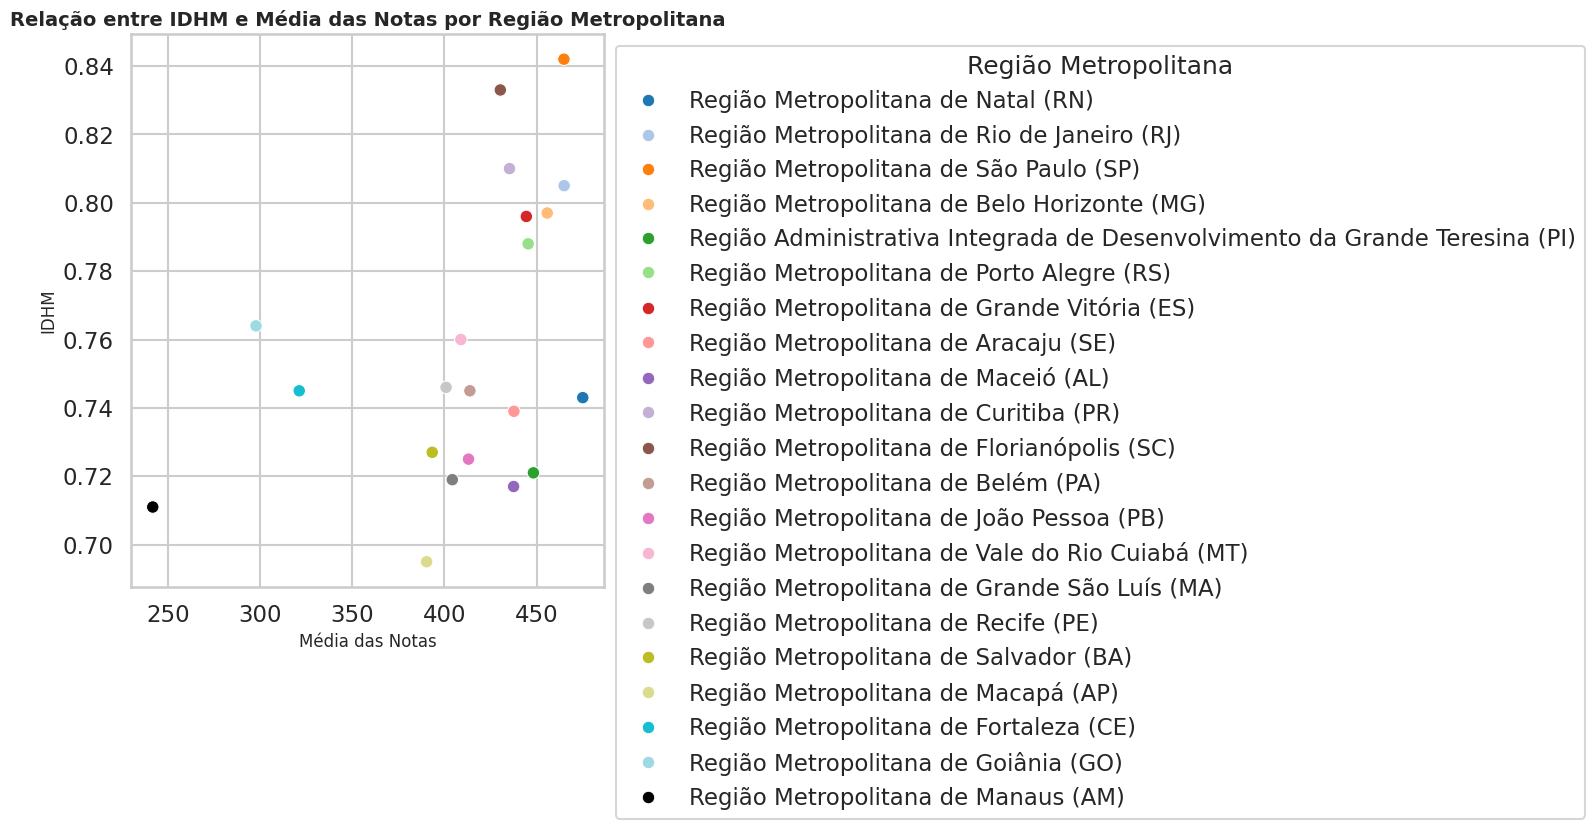

In [119]:
plt.figure(figsize=(16, 8))

tab20_palette = sns.color_palette("tab20")
custom_palette = tab20_palette + ['#000000']

sns.scatterplot(data=dados_2021, x='MEDIA_NOTAS', y='IDHM', hue='RM', palette=custom_palette)

plt.title('Relação entre IDHM e Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('IDHM', fontsize=12)
plt.legend(title='Região Metropolitana', bbox_to_anchor=(1, 1), loc='upper left')  # Coloca a legenda fora do gráfico

plt.tight_layout()
plt.show()


# Correlação entre as duas Variáveis

In [117]:
correlacao = dados_2021['IDHM'].corr(dados_2021['MEDIA_NOTAS'])
print(correlacao)

0.415872956714949


Pearson (0.4159): Este coeficiente mede a correlação linear entre duas variáveis. O valor de 0,4159 indica uma correlação positiva moderada, ou seja, à medida que o IDHM aumenta, as médias das notas do ENEM tendem a aumentar de maneira linear, mas não perfeitamente. Ainda há alguma variação nos dados que não é capturada por essa correlação.

In [118]:
correlacao_spearman = dados_2021['IDHM'].corr(dados_2021['MEDIA_NOTAS'], method='spearman')
print(correlacao_spearman)

0.44235143612654193


Spearman (0.4424): O coeficiente de Spearman mede a correlação baseada nos rankings das variáveis, independentemente da linearidade. O valor de 0,4424 sugere uma correlação positiva moderada, indicando que o aumento do IDHM está associado ao aumento do desempenho no ENEM, mas a relação pode ser mais robusta em termos de posição relativa entre as regiões.